## Final Exam Statistics Semester 1

### Contents

- <a href='#1-ComputerUse'>1 - ComputerUse</a>
- <a href='#2-Marriott'>2 - Marriott</a>
- <a href='#3-SpeedTest'>3 - SpeedTest</a>
- <a href='#4-CPI'>4 - CPI</a>
- <a href='#5-NBA2008'>5 - NBA2008</a>
- <a href='#6-MovieRevenues'>6 - Movie Revenues</a>
- <a href='#7-LinkedInMembers'>7 - LinkedIn Members</a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='1-ComputerUse'></a>

#### 1 - ComputerUse


In [2]:
cu = pd.read_csv("1_ComputerUse.csv",usecols=np.r_[0:9], header=0)
cu = cu.dropna()
print(cu.isnull().sum(),"\n")
print(cu.info(),"\n")
print(cu.shape)

Credit Hours            0
Major                   0
Comp. Use               0
Comp. Hrs.              0
Labs                    0
Benefit                 0
Higher Tuition          0
Enrollment Decision     0
Price willing to pay    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit Hours          238 non-null    float64
 1   Major                 238 non-null    float64
 2   Comp. Use             238 non-null    float64
 3   Comp. Hrs.            238 non-null    float64
 4   Labs                  238 non-null    float64
 5   Benefit               238 non-null    float64
 6   Higher Tuition        238 non-null    float64
 7   Enrollment Decision   238 non-null    float64
 8   Price willing to pay  238 non-null    float64
dtypes: float64(9)
memory usage: 18.6 KB
None 

(238, 9)


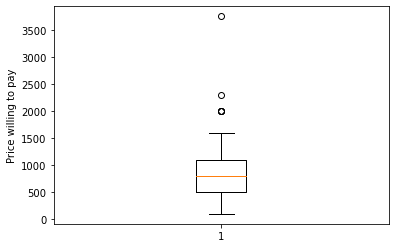

In [3]:
# visualizing box plot

fig, ax = plt.subplots()

ax.boxplot(cu["Price willing to pay"])
ax.set_ylabel("Price willing to pay")
plt.show()

In [4]:
# descriptive summary

cu["Price willing to pay"].describe()

count     238.000000
mean      844.457983
std       435.040127
min       100.000000
25%       507.500000
50%       800.000000
75%      1100.000000
max      3750.000000
Name: Price willing to pay, dtype: float64

In [5]:
# creating detecting outliers function using Z score

def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return "The outliers are as follows:",outliers

# test the function on the dataset
cu_outliers = detect_outlier(cu["Price willing to pay"])
print(cu_outliers)

('The outliers are as follows:', [3750.0, 2300.0])


In [6]:
# hypothesis testi for Labs variable
# use non parametric chi square 

# import stats library
from scipy.stats import chisquare

# getting the variable from dataset
labs_freq = cu.Labs.value_counts()
print(labs_freq,"\n")

# creating the function
def chisquare_test(data,cl):
    cl = 1 - cl
    stats, p = chisquare(data)
    result = 'chisquare=%.3f, p_value=%.3f\n' % (stats, p)
    if p < cl:
        print('The null hypothesis is rejected')  
    else: 
        print('The null hypothesis is accepted') 
    return result

# conduct stats test
print(chisquare_test(data=labs_freq,cl=0.95))

2.0    101
1.0     48
3.0     43
5.0     41
4.0      5
Name: Labs, dtype: int64 

The null hypothesis is rejected
chisquare=99.395, p_value=0.000



<a id='2-Marriott'></a>

#### 2 - Marriott


In [7]:
m = pd.read_excel("1_Marriott.xlsx",header=0)
m = m.dropna()
print(m.isnull().sum(),"\n")
print(m.info(),"\n")
print(m.shape,"\n")
print(m.head(5))

Fairfield Inn    0
Residence Inn    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Fairfield Inn  100 non-null    int64
 1   Residence Inn  100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB
None 

(100, 2) 

   Fairfield Inn  Residence Inn
0              3              5
1              1              2
2              2              2
3              1              3
4              1              8


In [8]:
# conduct numerical normality test 
# observation is more than 50, proceed with Kalmogorov Test

# import relevant library
import scipy.stats
from scipy.stats import norm
from scipy.stats import kstest 

# create the function
def kalmogorov_test(cl,data):
    a = 1 - cl
    loc, scale = norm.fit(data) 
    n = norm(loc=loc, scale=scale)    
    stats,p=scipy.stats.kstest(data, n.cdf)  
    result = 'Kalmogorov Statistics=%.3f, p_value=%.3f\n' % (stats, p)
    if p < a:
        print('The null hypothesis is rejected') 
        print('Data is NOT NORMALLY distributed') 
    else: 
        print('The null hypothesis is accepted') 
        print('Data is NORMALLY distributed')
    return result

# conduct normality test
print(kalmogorov_test(cl=0.95,data=m["Fairfield Inn"]))
print(kalmogorov_test(cl=0.95,data=m["Residence Inn"]))

The null hypothesis is rejected
Data is NOT NORMALLY distributed
Kalmogorov Statistics=0.170, p_value=0.005

The null hypothesis is rejected
Data is NOT NORMALLY distributed
Kalmogorov Statistics=0.184, p_value=0.002



In [9]:
# perform non parametric test either median or mann-whitney test

from scipy.stats import mannwhitneyu

def mwt_test(cl,x1,x2):
    a = 1 - cl
    stats, p = scipy.stats.mannwhitneyu(x1,x2)
    result = 'Mann-Whitney Statistics=%.3f, p_value=%.3f\n' % (stats, p)
    if p < a:
        print('The null hypothesis is rejected as P-value is less than α') 
    else: 
        print('The null hypothesis is accepted as P-value is more than α') 
    return result

print(mwt_test(cl=0.95,x1=m["Fairfield Inn"],x2=m["Residence Inn"]))

The null hypothesis is accepted as P-value is more than α
Mann-Whitney Statistics=4419.500, p_value=0.075



<a id='3-SpeedTest'></a>

#### 3 - SpeedTest


In [22]:
st = pd.read_excel("1_SpeedTest.xlsx",header=0)
print(st.isnull().sum(),"\n")
print(st.info(),"\n")
print(st.shape,"\n")
print(st.head(5))

California Cars       0
Out-of-State Cars    65
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   California Cars    140 non-null    int64  
 1   Out-of-State Cars  75 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.3 KB
None 

(140, 2) 

   California Cars  Out-of-State Cars
0               66               63.0
1               66               54.0
2               58               59.0
3               68               58.0
4               63               59.0


In [41]:
# splitting the variables from the dataframe

cc = st["California Cars"].astype("float").to_frame()
osc = st["Out-of-State Cars"].to_frame()
osc = osc.dropna()

print(cc)
print(osc)

     California Cars
0               66.0
1               66.0
2               58.0
3               68.0
4               63.0
..               ...
135             50.0
136             63.0
137             67.0
138             63.0
139             61.0

[140 rows x 1 columns]
    Out-of-State Cars
0                63.0
1                54.0
2                59.0
3                58.0
4                59.0
..                ...
70               64.0
71               52.0
72               64.0
73               72.0
74               59.0

[75 rows x 1 columns]


In [30]:
# observation is more than 50, proceed with Kalmogorov Test
# conduct normality test

print(kalmogorov_test(cl=0.95,data=cc))
print(kalmogorov_test(cl=0.95,data=osc))

The null hypothesis is accepted
Data is NORMALLY distributed
Kalmogorov Statistics=0.051, p_value=0.842

The null hypothesis is accepted
Data is NORMALLY distributed
Kalmogorov Statistics=0.089, p_value=0.568



In [31]:
# proceed to conduct statistical testing using parametric one sample T-Test

# import the library
from scipy.stats import ttest_1samp  

def one_sample_ttest(cl,data,test_val):
    a = 1 - cl
    stats,p = ttest_1samp(data,test_val)
    result = 'One Sample T-test Statistics=%.3f, p_value=%.3f\n' % (stats, p)
    if(p/2)<a:                                               
        print('The null hypothesis is rejected as P-value is less than α')
    else:
        print('The null hypothesis is accepted as P-value is more than α')
    return result

# conduct the test
print(one_sample_ttest(cl=0.90,data=st["California Cars"],test_val=61.96))

The null hypothesis is rejected as P-value is less than α
One Sample T-test Statistics=3.674, p_value=0.000



<a id='4-CPI'></a>

#### 4 - CPI


In [32]:
cpi = pd.read_excel("1-2_CPI.xlsx",usecols= np.r_[0:5], header=0)
print(cpi.isnull().sum(),"\n")
print(cpi.info(),"\n")
print(cpi.shape,"\n")
print(cpi.head(5))

Year            0
Month           0
Unemployment    0
CPI             0
Inflation       0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          144 non-null    int64  
 1   Month         144 non-null    int64  
 2   Unemployment  144 non-null    float64
 3   CPI           144 non-null    float64
 4   Inflation     144 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 5.8 KB
None 

(144, 5) 

   Year  Month  Unemployment    CPI  Inflation
0  2000      1           4.0  169.3      0.296
1  2000      2           4.1  170.0      0.413
2  2000      3           4.0  171.0      0.588
3  2000      4           3.8  170.9     -0.058
4  2000      5           4.0  171.2      0.176


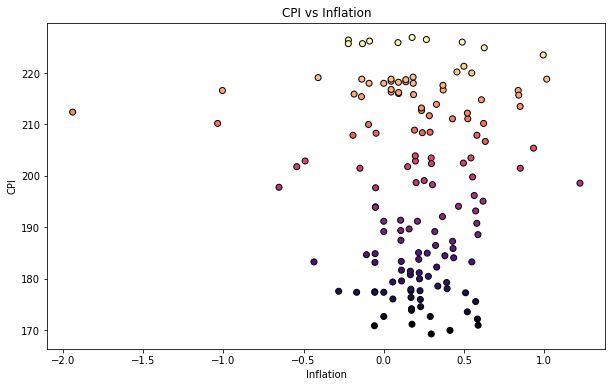

In [33]:
# creating scatter plot for CPI & Inflation

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(cpi.Inflation, cpi.CPI,c=cpi.CPI, cmap="magma",edgecolors="black")
ax.set_xlabel("Inflation")
ax.set_ylabel("CPI")
ax.set_title("CPI vs Inflation")

plt.show()

In [34]:
# conduct Pearson Correlation Test

# import relevant library
from scipy.stats import pearsonr
from scipy.stats import spearmanr

def pearson_corr_test(cl,data1,data2):
    a = 1 - cl
    corr,p = pearsonr(data1, data2)
    result = 'Pearsons correlation=%.3f, p_value=%.3f\n' % (corr,p)
    if p < a:
        print('The null hypothesis is rejected')
        print("There is a relationship between the variables")
    else:
        print('The null hypothesis is accepted')
        print("There is a no relationship between the variables")
    return result

def spearman_corr_test(cl,data1,data2):
    a = 1 - cl
    rho, p = spearmanr(data1,data2)
    result = 'Spearman correlation=%.3f, p_value=%.3f\n' % (rho,p)
    if p < a:
        print('The null hypothesis is rejected')
        print("There is a relationship between the variables")
    else:
        print('The null hypothesis is accepted')
        print("There is a no relationship between the variables")
    return result

# test the variables
print(pearson_corr_test(cl=0.95,data1=cpi.CPI,data2=cpi.Inflation))
print(spearman_corr_test(cl=0.95, data1=cpi.CPI,data2=cpi.Inflation))

The null hypothesis is accepted
There is a no relationship between the variables
Pearsons correlation=-0.042, p_value=0.617

The null hypothesis is accepted
There is a no relationship between the variables
Spearman correlation=-0.034, p_value=0.682



<a id='5-NBA2008'></a>

#### 5 - NBA2008


In [35]:
nba = pd.read_excel("1_NBA2008.xlsx",header=0)
print(nba.isnull().sum(),"\n")
print(nba.info(),"\n")
print(nba.shape,"\n")
print(nba.head(5))

Team Name                 0
Wins                      0
Field Goal (%)            0
Field Goal (%) Allowed    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team Name               30 non-null     object 
 1   Wins                    30 non-null     int64  
 2   Field Goal (%)          30 non-null     float64
 3   Field Goal (%) Allowed  30 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None 

(30, 4) 

             Team Name  Wins  Field Goal (%)  Field Goal (%) Allowed
0        Atlanta Hawks    37           0.454                   0.463
1       Boston Celtics    66           0.475                   0.419
2    Charlotte Bobcats    32           0.452                   0.466
3        Chicago Bulls    33           0.435                   0.453
4  Cleveland Cavaliers    45 

In [85]:
# import relevant library
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
import math

# creating regression function
def reg(x,y,alpha):
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    result = model.fit()
    summary = result.summary(alpha)
    equa = "y_hat =",round(result.params[1],4),"x +",round(result.params[0],4), "+",round(result.params[2],4)
    msr = result.mse_model.round(2)
    mse = result.mse_resid.round(2)
    rmse = math.sqrt(mse)
    return summary, equa, msr, mse, rmse

summary, equa, msr, mse, rmse = reg(x=nba[["Field Goal (%)","Field Goal (%) Allowed"]], y=nba.Wins, alpha=0.05) 

print(
    f"Overall summary {summary}\n"
    f"The equation is {equa}\n"
    f"The MSR is {msr}\n"
    f"The MSE is {mse}\n"
    f"The RMSE is {rmse}"
)

Overall summary                             OLS Regression Results                            
Dep. Variable:                   0.05   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     51.57
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           6.00e-10
Time:                        12:07:06   Log-Likelihood:                -97.265
No. Observations:                  30   AIC:                             200.5
Df Residuals:                      27   BIC:                             204.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const       

<a id='6-MovieRevenues'></a>

#### 6 - Movie Revenues


In [58]:
mr = pd.read_excel("1_Movie Revenues.xlsx",header=0)
print(mr.isnull().sum(),"\n")
print(mr.info(),"\n")
print(mr.shape,"\n")
print(mr.head(5))

Year                    0
Revenues ($billions)    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  26 non-null     int64  
 1   Revenues ($billions)  26 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 544.0 bytes
None 

(26, 2) 

   Year  Revenues ($billions)
0  1995                  5.29
1  1996                  5.59
2  1997                  6.51
3  1998                  6.78
4  1999                  7.30


In [63]:
mr["Year"] = pd.to_datetime(mr['Year'], format='%Y')
mr.Year.head(5)

0   1995-01-01
1   1996-01-01
2   1997-01-01
3   1998-01-01
4   1999-01-01
Name: Year, dtype: datetime64[ns]

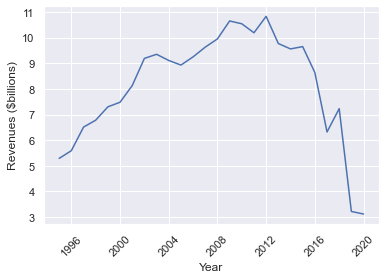

In [74]:
plt.plot(mr.Year, mr["Revenues ($billions)"])
plt.ylabel('Revenues ($billions)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

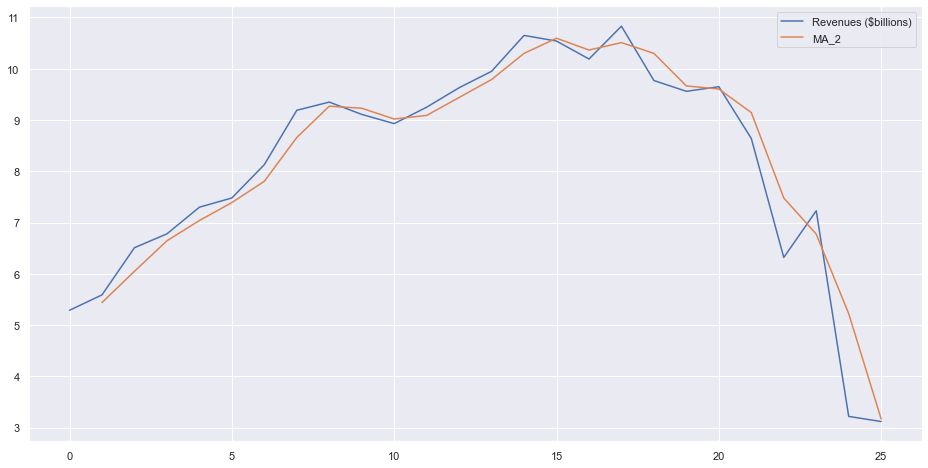

In [61]:
# performing moving average with lag 2 period time series analysis 

mr["MA_2"] = mr["Revenues ($billions)"].rolling(2).mean()

mr[['Revenues ($billions)', 'MA_2']].plot(label='mr',figsize=(16, 8))

c:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

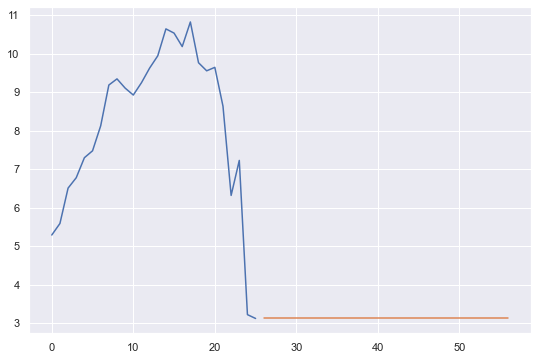

In [62]:
# perform exponential smoothing with alpha 0.3

# import library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# create the model
model = ExponentialSmoothing(endog=mr["Revenues ($billions)"]).fit()
predictions = model.forecast(steps = 31)

mr["Revenues ($billions)"].plot(figsize=(9,6))
predictions.plot()

<a id='7-LinkedInMembers'></a>

#### 7 - LinkedIn Members


In [75]:
lim = pd.read_excel("1_LinkedIn Members.xlsx",header=0)
print(lim.isnull().sum(),"\n")
print(lim.info(),"\n")
print(lim.shape,"\n")
print(lim.head(5))

Quarter    0
Year       0
Members    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  22 non-null     int64  
 1   Year     22 non-null     int64  
 2   Members  22 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 656.0 bytes
None 

(22, 3) 

   Quarter  Year  Members
0        1  2009     37.3
1        2  2009     42.0
2        3  2009     48.0
3        4  2009     55.1
4        1  2010     64.2


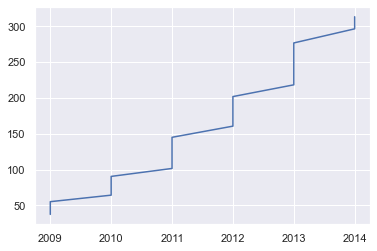

In [76]:
plt.plot(lim.Year,lim.Members)
plt.show()

In [78]:
lim.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,Quarter,Year,Members
Quarter,1.000000,-0.139006,0.006029
Year,-0.139006,1.000000,0.978240
Members,0.006029,0.978240,1.000000


In [79]:
lim.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Quarter,Year,Members
Quarter,1.000000,-0.130159,0.035566
Year,-0.130159,1.000000,0.985496
Members,0.035566,0.985496,1.000000


In [84]:
print("Year & Member", pearson_corr_test(0.95,lim.Year,lim.Members))
print("Year & Member",spearman_corr_test(0.95,lim.Year,lim.Members))
print("Year & Quarter", pearson_corr_test(0.95,lim.Quarter,lim.Members))
print("Year & Quarter",spearman_corr_test(0.95,lim.Quarter,lim.Members))

The null hypothesis is rejected
There is a relationship between the variables
Year & Member Pearsons correlation=0.978, p_value=0.000

The null hypothesis is rejected
There is a relationship between the variables
Year & Member Spearman correlation=0.985, p_value=0.000

The null hypothesis is accepted
There is a no relationship between the variables
Year & Quarter Pearsons correlation=0.006, p_value=0.979

The null hypothesis is accepted
There is a no relationship between the variables
Year & Quarter Spearman correlation=0.036, p_value=0.875

